**Phase 1: Data Preprocessing**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Global_Pollution_Analysis .csv to Global_Pollution_Analysis .csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

 Step 1: Data Import and Cleaning

In [3]:
# Load the dataset
df = pd.read_csv('Global_Pollution_Analysis .csv')

# Label Encoding for categorical features
le_country = LabelEncoder()
df['Country_Encoded'] = le_country.fit_transform(df['Country'])

le_year = LabelEncoder()
df['Year_Encoded'] = le_year.fit_transform(df['Year'])


Step 2: Feature Engineering

In [10]:
# Feature Engineering: Create pollution severity category
pollution_avg = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)
df['Pollution_Severity'] = pd.cut(pollution_avg,
                                   bins=[-np.inf, 100, 200, np.inf],
                                   labels=['Low', 'Medium', 'High'])

# Feature Engineering: Energy consumption per capita ratio (already in dataset) and pollution trend
df['Pollution_Trend'] = df.groupby('Country')['Air_Pollution_Index'].diff().fillna(0)

# Features to be standardized
features_to_scale = [
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
    'Energy_Recovered (in GWh)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'GDP_Per_Capita (in USD)',
    'Population (in millions)', 'Renewable_Energy (%)', 'Pollution_Trend'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Final Feature Set
features = df_scaled[features_to_scale + ['Country_Encoded', 'Year_Encoded']]
target = df_scaled['Pollution_Severity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Phase 2: Classification and Evaluation**

Step 3: Naive Bayes Classifier

In [14]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


Step 4: KNNN

In [15]:
#K-Nearest Neighbors
best_k = 5  # Default; hyperparameter tuning can be added
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Step 5: Decision Tree

In [16]:
#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

**Phase 3: Evaluation Reports**

Step 6: Model Comperission


--- Multinomial Naive Bayes ---
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.50      0.67        10
      Medium       0.86      1.00      0.92        30

    accuracy                           0.88        40
   macro avg       0.93      0.75      0.79        40
weighted avg       0.89      0.88      0.86        40



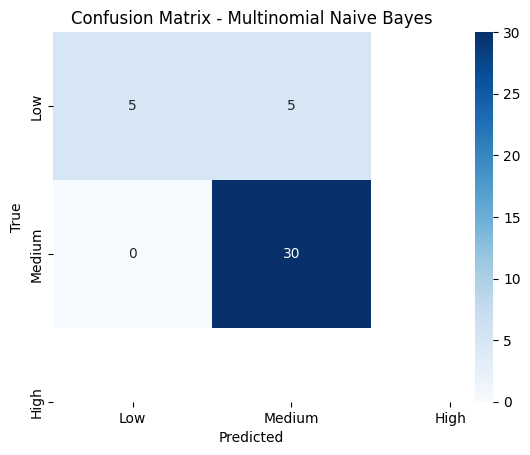


--- K-Nearest Neighbors ---
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         Low       0.50      0.10      0.17        10
      Medium       0.76      0.97      0.85        30

    accuracy                           0.75        40
   macro avg       0.63      0.53      0.51        40
weighted avg       0.70      0.75      0.68        40



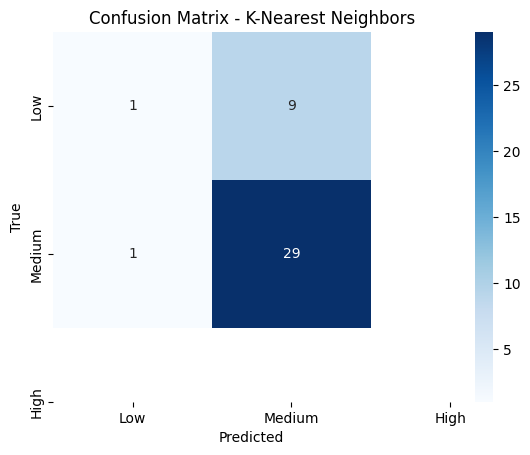


--- Decision Tree ---
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

         Low       0.78      0.70      0.74        10
      Medium       0.90      0.93      0.92        30

    accuracy                           0.88        40
   macro avg       0.84      0.82      0.83        40
weighted avg       0.87      0.88      0.87        40



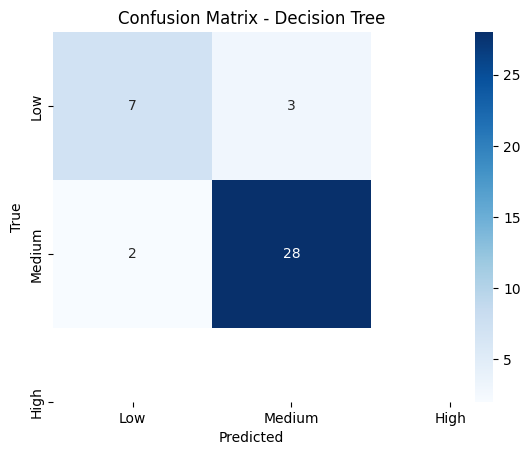

In [19]:
def evaluate_model(y_true, y_pred, title):
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Evaluate all models
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Step 7: Actionable Insights

In [20]:
# Insights
# Basic insight extraction (example only)
print("\nTop 5 Countries with Highest Average Pollution:")
country_pollution = df.groupby('Country')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean()
country_pollution['Average_Pollution'] = country_pollution.mean(axis=1)
print(country_pollution.sort_values(by='Average_Pollution', ascending=False).head())

print("\nPolicy Recommendation: Increase renewable energy usage in countries with high pollution severity and low renewable energy %.\n")



Top 5 Countries with Highest Average Pollution:
                          Air_Pollution_Index  Water_Pollution_Index  \
Country                                                                
Saint Barthelemy                       297.13                 172.63   
Bolivia                                253.88                 188.37   
Central African Republic               209.41                 188.14   
Christmas Island                       245.99                 157.14   
Papua New Guinea                       274.13                 138.76   

                          Soil_Pollution_Index  Average_Pollution  
Country                                                            
Saint Barthelemy                         91.35         187.036667  
Bolivia                                 102.24         181.496667  
Central African Republic                133.50         177.016667  
Christmas Island                        124.72         175.950000  
Papua New Guinea                      